In [1]:
#Imports

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle



In [2]:
#length of the shaft
shaft = int(input("Length of shaft: "))
unit_length = input("Unit: ")



Length of shaft:  6
Unit:  m


In [3]:
forces, distances, moments = [], [], []

In [4]:


#Number of Forces
nf = int(input("How many forces? "))
unit_force = input("Unit: ")
f_num = 1



while nf > 0:
    
    dist = float(input(f"Distance of load {f_num} from point 0: "))
    load = float(input(f"Magnitude and direction of load  {f_num}: "))

    
    forces.append(load)
    distances.append(dist)

    f_num += 1
    nf -= 1
    

How many forces?  2
Unit:  kN
Distance of load 1 from point 0:  2
Magnitude and direction of load  1:  -15
Distance of load 2 from point 0:  4
Magnitude and direction of load  2:  -6


In [5]:
#calculating for moments
for i in forces:
    moment = i * distances[forces.index(i)]
    moments.append(moment)


In [6]:
# the reactions are mostly assumed to be at the ends of the shaft

reaction_2 =  abs(sum(moments)) / shaft

reaction_1 = abs(sum(forces)) -reaction_2
print(f"Reaction 1 is {reaction_1}{unit_force}  \nReaction 2 is {reaction_2}{unit_force}")

Reaction 1 is 12.0kN  
Reaction 2 is 9.0kN


In [8]:
#New moments with reaction 1
moments =[]
moments.append(reaction_1*distances[0])
moments.append(moments[0] + (reaction_1 + forces[0])*(distances[1]-distances[0]))


Text(0, 0.5, 'Forces /kN')

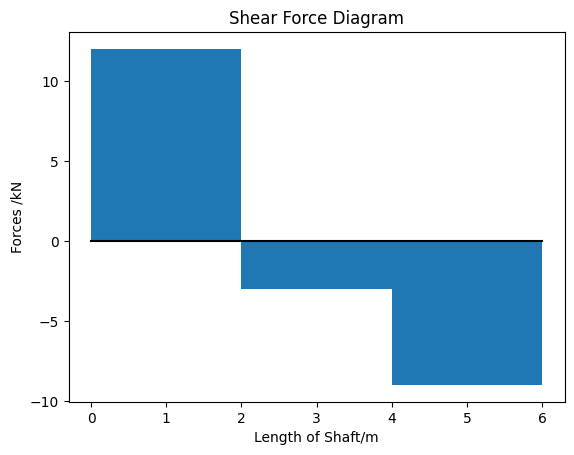

In [9]:
end_point_of_shaft = [shaft, 0]#the x coordinate is for the length of the shaft
start_point_of_shaft = [0,0]

fig, ax = plt.subplots()
                 
ax.plot(end_point_of_shaft, start_point_of_shaft, color ="black")


#Shear Force Diagram
#They are represented by Rectangles
rect1 = Rectangle((0, 0), distances[0], reaction_1)

rect2 = Rectangle((distances[0], 0), distances[1]-distances[0], reaction_1+ forces[0])

rect3 = Rectangle((distances[1], 0), shaft-distances[1], -reaction_2)

ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.set_title("Shear Force Diagram")
ax.set_xlabel(f"Length of Shaft/{unit_length}")
ax.set_ylabel(f"Forces /{unit_force}")

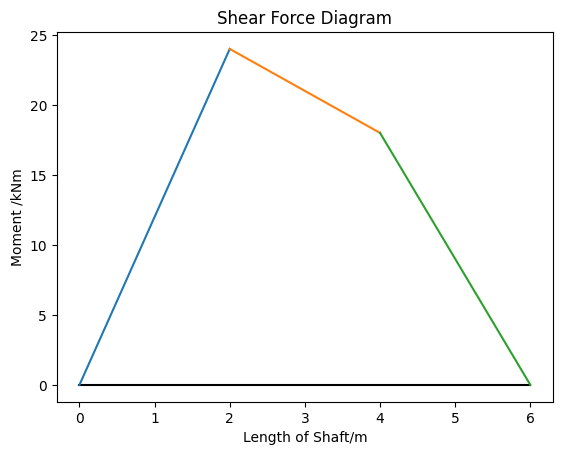

In [10]:
#Bemding Moment Diagram

fig2, sf = plt.subplots()

#moment at point 1

sf.plot(end_point_of_shaft, start_point_of_shaft, color ="black")

sf.plot((0,distances[0]),(0, moments[0]))
sf.plot((distances[0],distances[1]),(moments[0],moments[1]))
sf.plot((distances[1],shaft),(moments[1],0))

sf.set_title("Shear Force Diagram")
sf.set_xlabel(f"Length of Shaft/{unit_length}")
sf.set_ylabel(f"Moment /{unit_force}{unit_length}")

plt.show()
